# STAT 360: HW #1 - Solution

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Reading data in using read_csv
Haystacks <- read_csv("http://www.StatsClass.org/stat360/Datasets/Haystacks.csv")

Rows: 120 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): RowID, Volume, Circumference, Over

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(Haystacks)

RowID Volume Circumference Over
1 1     2853   69.0          37.0
2 2     2702   65.0          36.5
3 3     3099   73.0          38.5
4 4     1306   62.5          26.5
5 5     2294   70.0          35.0
6 6     2725   68.0          36.5

### Marginal Distribution

In [4]:
#@title Question 1: Marginal Distribution
( Haystacks
     %>% summarize(
                    Avg = mean(Volume),
                    'Standard Deviation' = sd(Volume),
                    'Variance' = var(Volume),
                    Count = n()
                 )
     %>% mutate('Total Unexplained' = (Count - 1) * Variance)
)

Avg      Standard Deviation Variance Count Total Unexplained
1 3017.789 914.698            836672.5 120   99564027

### Distribution of Volume | Circumference

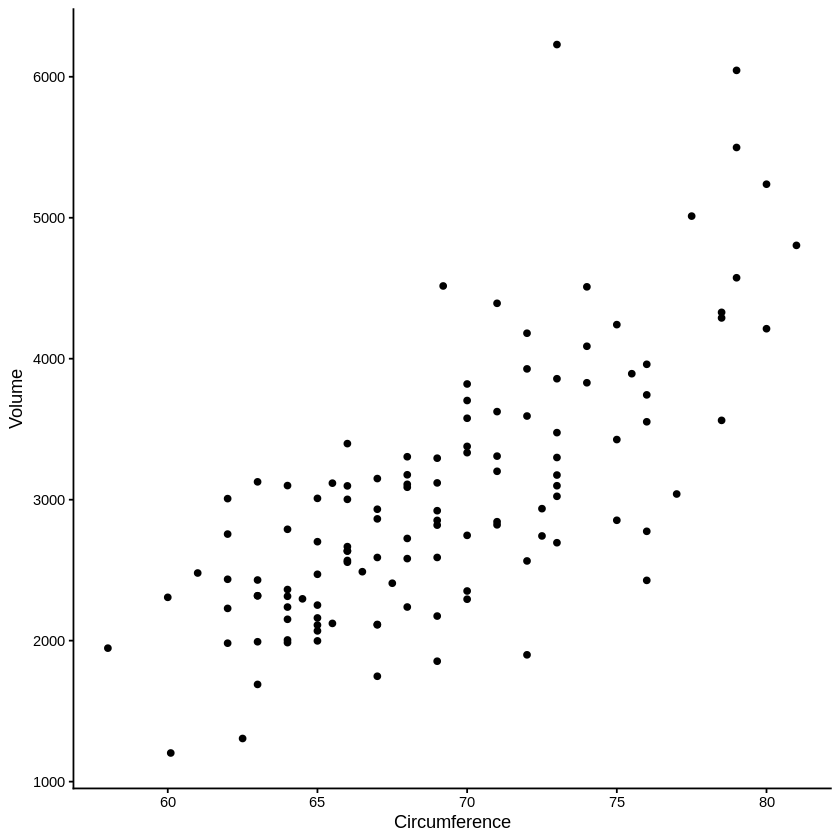

In [5]:
#@title Question 2: Plot of Volume vs Circumference
ggplot(data=Haystacks, aes(x=Circumference, y=Volume)) +
  geom_point() +
  theme_classic()

In [6]:
#@title Question 4: Getting the predicted volume and plotting the function on the scatterplot
Haystacks <- (Haystacks
               %>% mutate(Predicted_Volume_withCircumference = (Circumference^3) / (12 * 3.1416^2))
             )

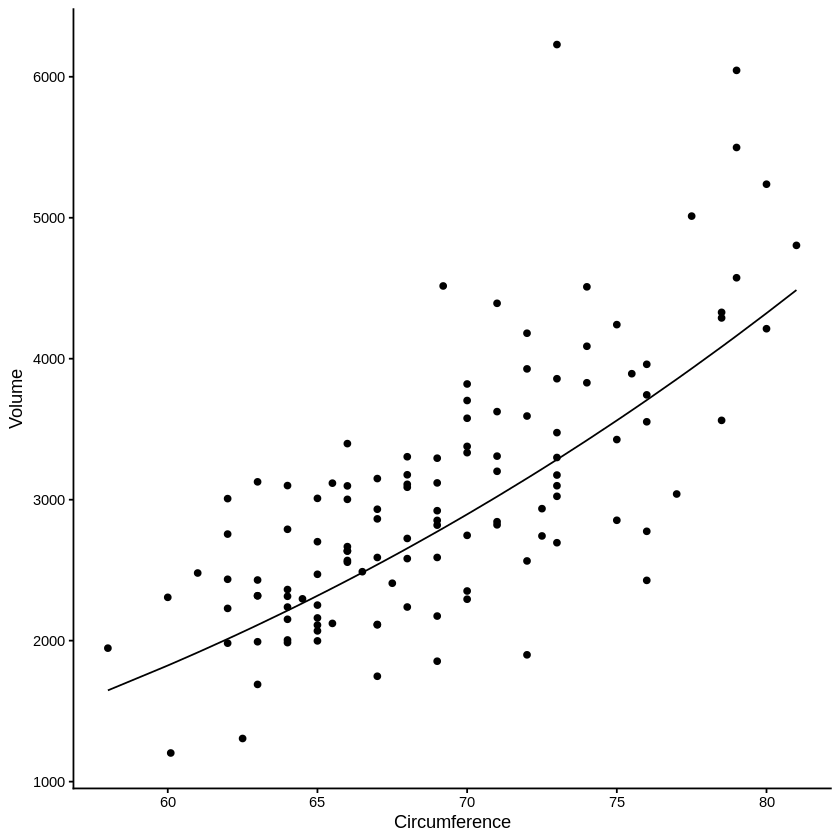

In [7]:
ggplot(data=Haystacks, aes(x=Circumference, y=Volume)) +
  geom_point() +
  geom_line(aes(x=Circumference, y=Predicted_Volume_withCircumference)) +
  theme_classic()

In [8]:
#@title Question 5: Total Unexplained Variation in Conditional Distribution
Haystacks <- (Haystacks
               %>% mutate(Residual_withCircumference = (Volume - Predicted_Volume_withCircumference),
                          Residual_withCircumferenceSquared = Residual_withCircumference^2
                         )
             )

(Haystacks
     %>% summarize(
                    'Total Unexplained Conditional' = sum(Residual_withCircumferenceSquared)
                  )
)

Total Unexplained Conditional
1 50151624

### Distribution of Volume | Over

In [9]:
Haystacks <- (Haystacks
    %>% mutate(Predicted_Volume_withOver = ( 2*(Over^3) )/ (3 * 3.1416^2))
)

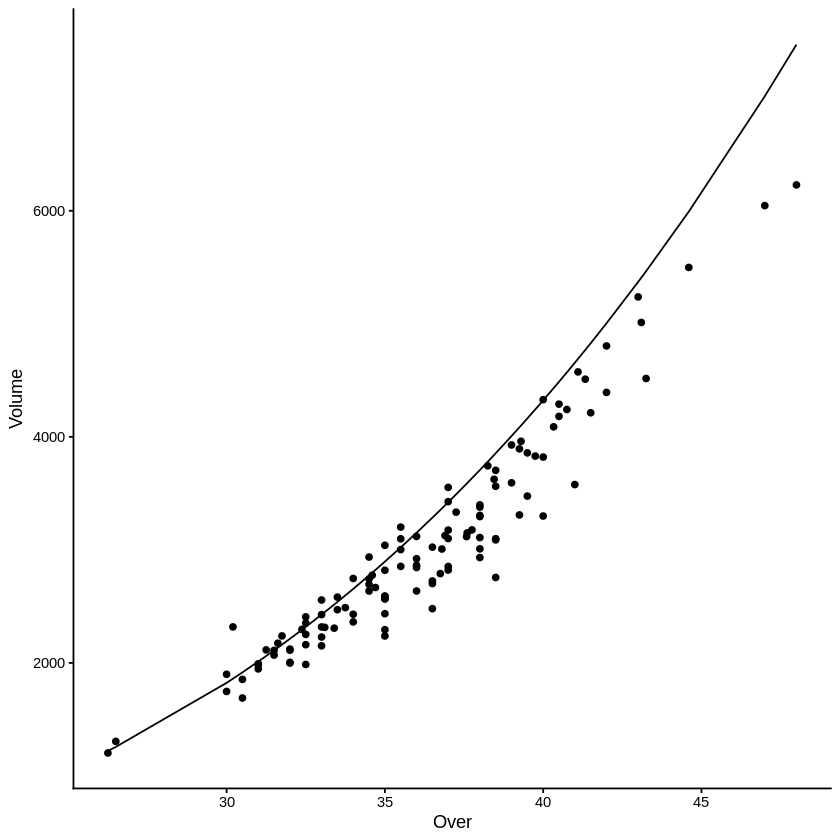

In [10]:
#@title Question 7: Plot of Volume vs Over
ggplot(data=Haystacks, aes(x=Over, y=Volume)) +
  geom_point() +
  geom_line(aes(x=Over, y=Predicted_Volume_withOver)) +
  theme_classic()

In [11]:
#@title Question 8: Total Unexplained Variation in Conditional Distribution
Haystacks <- (Haystacks
               %>% mutate(Residual_withOver = (Volume - Predicted_Volume_withOver),
                          Residual_withOverSquared = Residual_withOver^2
                         )
             )

(Haystacks
     %>% summarize(
                    'Total Unexplained Conditional' = sum(Residual_withOverSquared)
                  )
)

Total Unexplained Conditional
1 19953979



---


End of Document